<a href="https://colab.research.google.com/github/guimaraaes/data-science/blob/master/kaggle_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from pandas.plotting import scatter_matrix

import warnings
warnings.filterwarnings('ignore') 

from subprocess import check_output
# print(check_output(["ls", "../sample_data"]).decode("utf8"))

In [ ]:
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")
survived = data_train.Survived
data_train.drop('Survived', axis='columns', inplace=True)
train_lines = data_train.shape[0]
test_lines = data_test.shape[0]
data = pd.concat([data_train, data_test])

data.shape

(1309, 11)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [ ]:
data.isnull().mean().sort_values()

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000764
Embarked       0.001528
Age            0.200917
Cabin          0.774637
dtype: float64

In [ ]:
data.nunique().sort_values()

Sex               2
Pclass            3
Embarked          3
SibSp             7
Parch             8
Age              98
Cabin           186
Fare            281
Ticket          929
Name           1307
PassengerId    1309
dtype: int64

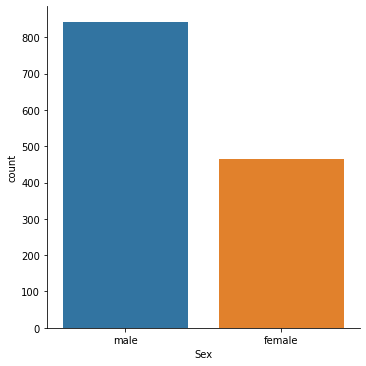

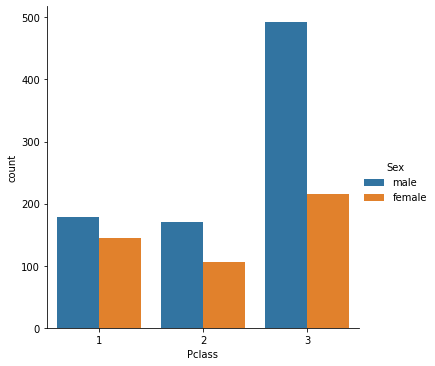

In [ ]:
sns.catplot(kind='count', x='Sex', data=data)
sns.catplot(kind='count', x='Pclass', hue='Sex', data=data)


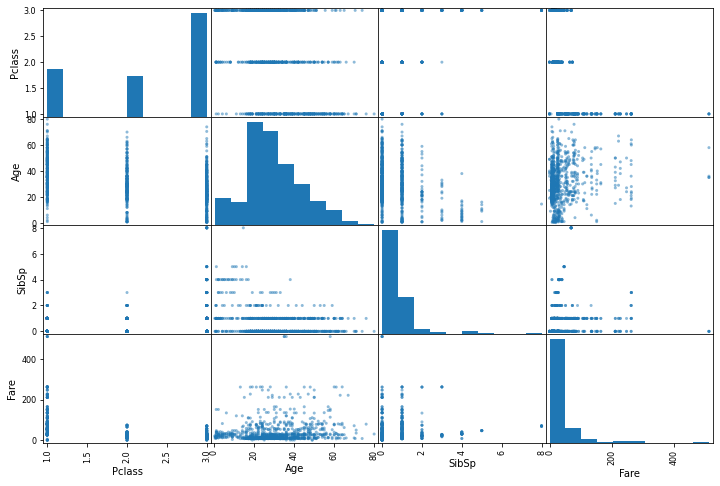

In [ ]:

scatter_matrix (data[['Pclass', 'Sex', 'Age','SibSp',  'Fare']], figsize = ( 12 , 8 ));

In [ ]:
treatment = []
for my_string in data['Name']:
  res = my_string.split(',', maxsplit=1)[-1]\
                .split(maxsplit=1)[0]
  treatment.append(res)
data['Treatment'] = treatment
# data.head(20)
count_treatment = data[['Name', 'Treatment']].groupby('Treatment').count()
age_treatment = data[['Age', 'Treatment']].groupby('Treatment').median()

pd.concat([count_treatment, age_treatment], axis='columns')

,Name,Age
Treatment,,
Capt.,1,70.0
Col.,4,54.5
Don.,1,40.0
Dona.,1,39.0
Dr.,8,49.0
Jonkheer.,1,38.0
Lady.,1,48.0
Major.,2,48.5
Master.,61,4.0


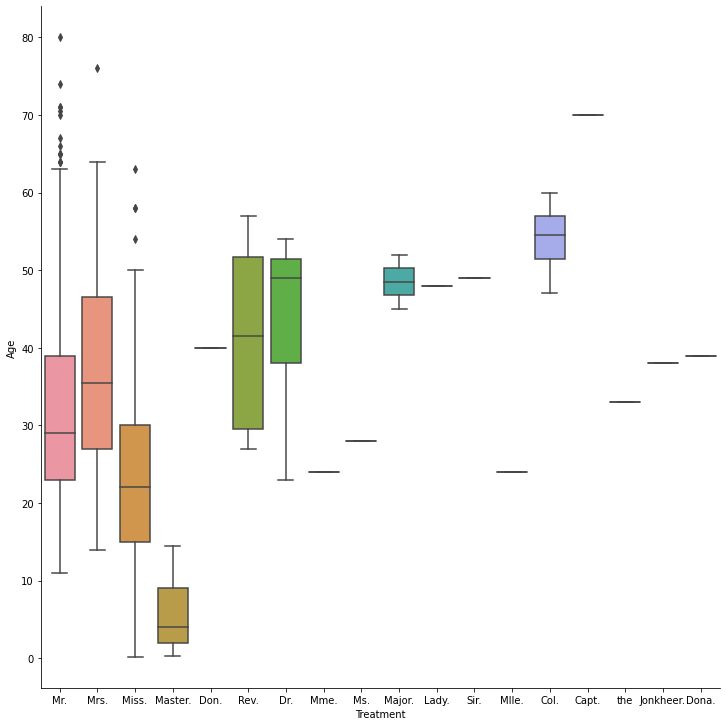

In [ ]:
sns.catplot(kind='box', y='Age', x='Treatment', data=data, height=10, aspect=1)

In [ ]:
sex_treatment = data[['Sex', 'Treatment']].groupby(['Treatment', 'Sex']).size()
sex_treatment

Treatment  Sex   
Capt.      male        1
Col.       male        4
Don.       male        1
Dona.      female      1
Dr.        female      1
           male        7
Jonkheer.  male        1
Lady.      female      1
Major.     male        2
Master.    male       61
Miss.      female    260
Mlle.      female      2
Mme.       female      1
Mr.        male      757
Mrs.       female    197
Ms.        female      2
Rev.       male        8
Sir.       male        1
the        female      1
dtype: int64

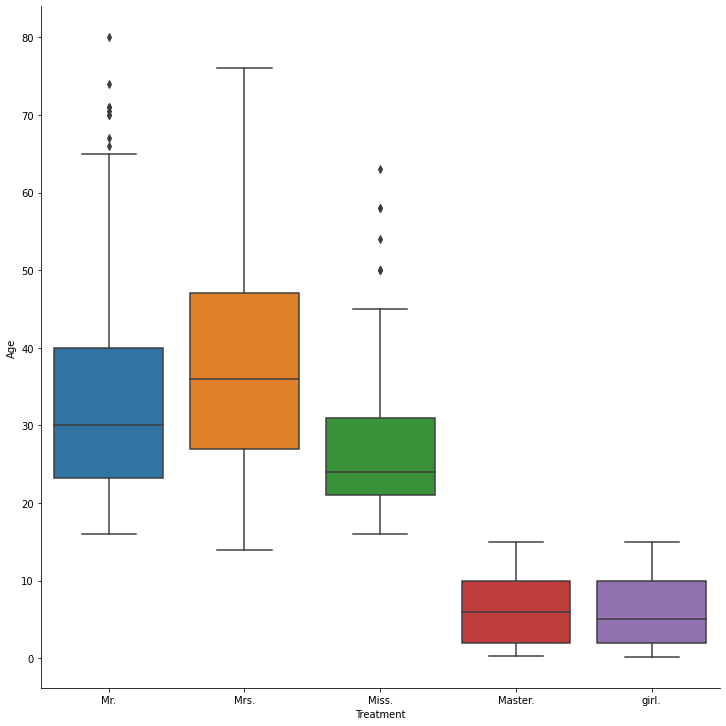

In [ ]:
data.loc[(data['Treatment'] == "Capt.") , "Treatment"] = "Mr."
data.loc[(data['Treatment'] == "Don.") , "Treatment"] = "Mr."
data.loc[(data['Treatment'] == "Col.") , "Treatment"] = "Mr."
data.loc[(data['Treatment'] == "Dona.") , "Treatment"] = "Mrs."
data.loc[(data['Treatment'] == "Dr.") & (data['Sex'] == "male"), "Treatment"] = "Mr."
data.loc[(data['Treatment'] == "Dr.") & (data['Sex'] == "female"), "Treatment"] = "Mrs."

data.loc[(data['Treatment'] == "Jonkheer.") , "Treatment"] = "Mr."
data.loc[(data['Treatment'] == "Lady.") , "Treatment"] = "Mrs."

data.loc[(data['Treatment'] == "Major.") , "Treatment"] = "Mr."

data.loc[(data['Treatment'] == "Mlle.") , "Treatment"] = "Miss."
data.loc[(data['Treatment'] == "Mme.") , "Treatment"] = "Miss."
data.loc[(data['Treatment'] == "Ms.") , "Treatment"] = "Miss."

data.loc[(data['Treatment'] == "Rev.") , "Treatment"] = "Mr."
data.loc[(data['Treatment'] == "Sir.") , "Treatment"] = "Mr."

data.loc[(data['Treatment'] == "the") , "Treatment"] = "Miss."

data.loc[(data['Treatment'] == "Miss.") & (data['Age'] <= 15), 'Treatment' ] = 'girl.' 
data.loc[(data['Treatment'] == "Mr.") & (data['Age'] <= 15), 'Treatment' ] = 'Master.' 
sex_treatment = data[['Sex', 'Treatment']].groupby(['Treatment', 'Sex']).size()
sex_treatment
sns.catplot(kind='box', y='Age', x='Treatment', data=data, height=10, aspect=1)

In [ ]:
data.loc[(data['Treatment'] == "Miss.") & (data['SibSp'] == 0)] 


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Treatment
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
11,12,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,Miss.
28,29,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,Miss.
32,33,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q,Miss.
44,45,3,"Devaney, Miss. Margaret Delia",female,19.0,0,0,330958,7.8792,NaN,Q,Miss.
...,...,...,...,...,...,...,...,...,...,...,...,...
400,1292,1,"Bonnell, Miss. Caroline",female,30.0,0,0,36928,164.8667,C7,S,Miss.
402,1294,1,"Gibson, Miss. Dorothy Winifred",female,22.0,0,1,112378,59.4000,NaN,C,Miss.
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q,Miss.
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q,Miss.


In [ ]:
count_treatment = data[['Name', 'Treatment']].groupby('Treatment').count()
age_treatment = data[['Age', 'Treatment']].groupby('Treatment').mean()
age_treatment2 = data[['Age', 'Treatment']].groupby('Treatment').median()

sex_treatment = data[['Sex', 'Treatment']].groupby(['Treatment']).first()
pd.concat([count_treatment, age_treatment, age_treatment2, sex_treatment], axis='columns')
# data.isnull().mean()


,Name,Age,Age,Sex
Treatment,,,,
Master.,67,6.314915,6.0,male
Miss.,212,27.015528,24.0,female
Mr.,776,32.975793,30.0,male
Mrs.,200,37.138728,36.0,female
girl.,54,6.594259,5.0,female


In [ ]:
data.loc[(data['Treatment'] == "Col.") & (data['Age'].isnull()), "Age"] = data.loc[data['Treatment'] == "Col.", "Age"].median()
data.loc[(data['Treatment'] == "Master.") & (data['Age'].isnull()), "Age"] = data.loc[data['Treatment'] == "Master.", "Age"].median()
data.loc[(data['Treatment'] == "Miss.") & (data['Age'].isnull()), "Age"] = data.loc[data['Treatment'] == "Miss.", "Age"].median()
data.loc[(data['Treatment'] == "Mr.") & (data['Age'].isnull()), "Age"] = data.loc[data['Treatment'] == "Mr.", "Age"].median()
data.loc[(data['Treatment'] == "Mrs.") & (data['Age'].isnull()), "Age"] = data.loc[data['Treatment'] == "Mrs.", "Age"].median()


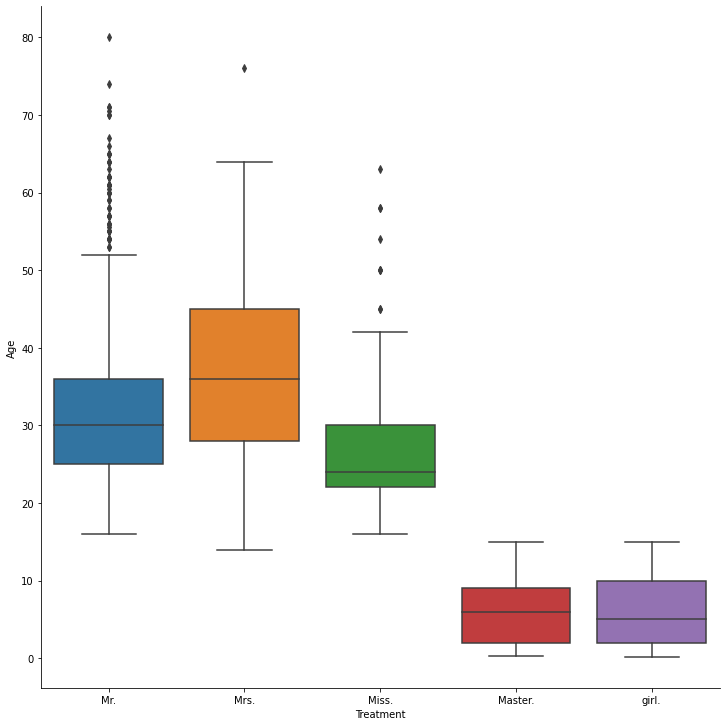

In [ ]:
sns.catplot(kind='box', y='Age', x='Treatment', data=data, height=10, aspect=1)

In [ ]:
data.loc[(data['Treatment'] == "Col.") , "Age"] = data.loc[data['Treatment'] == "Col.", "Age"].median()
data.loc[(data['Treatment'] == "Master.") , "Age"] = data.loc[data['Treatment'] == "Master.", "Age"].median()
data.loc[(data['Treatment'] == "Miss.") , "Age"] = data.loc[data['Treatment'] == "Miss.", "Age"].median()
data.loc[(data['Treatment'] == "Mr.") , "Age"] = data.loc[data['Treatment'] == "Mr.", "Age"].median()
data.loc[(data['Treatment'] == "Mrs.") , "Age"] = data.loc[data['Treatment'] == "Mrs.", "Age"].median()
data.loc[(data['Treatment'] == "girl.") , "Age"] = data.loc[data['Treatment'] == "girl.", "Age"].median()

data.loc[data['Embarked'].isnull() , "Embarked"] = "S"


data.isnull().mean()

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000764
Cabin          0.774637
Embarked       0.000000
Treatment      0.000000
dtype: float64

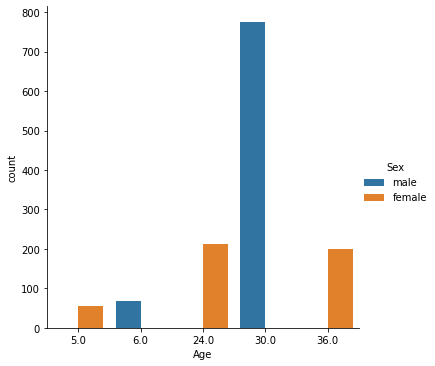

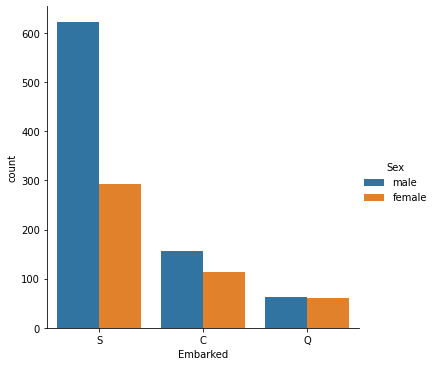

In [ ]:
sns.catplot(kind='count', x='Age', hue='Sex', data=data)
sns.catplot(kind='count', x='Embarked', hue='Sex', data=data)

In [ ]:
fare=data.loc[(data['Fare'].isnull()) ] 
data.loc[data['Fare'].isnull() , "Fare"] = 13.3
# fare
data.loc[(data['Fare'].isnull()) ] 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Treatment


In [ ]:
data.loc[(data['Pclass'] == 3) , "Fare"] = data.loc[data['Pclass'] == 3, "Fare"].median()
data.loc[(data['Pclass'] == 2) , "Fare"] = data.loc[data['Pclass'] == 2, "Fare"].median()
data.loc[(data['Pclass'] == 1) , "Fare"] = data.loc[data['Pclass'] == 1, "Fare"].median()


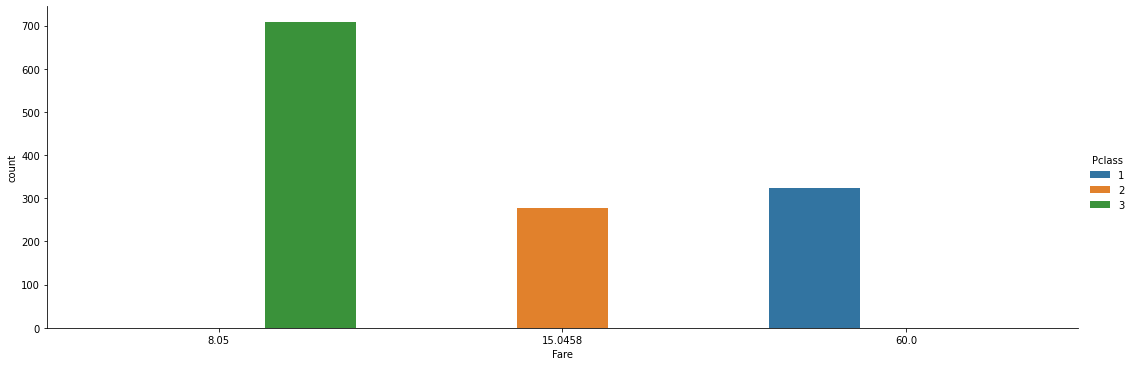

In [ ]:
sns.catplot(kind='count', x='Fare',  hue='Pclass', data=data, height=5, aspect=3)

In [ ]:
data.isnull().mean()

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.774637
Embarked       0.000000
Treatment      0.000000
dtype: float64

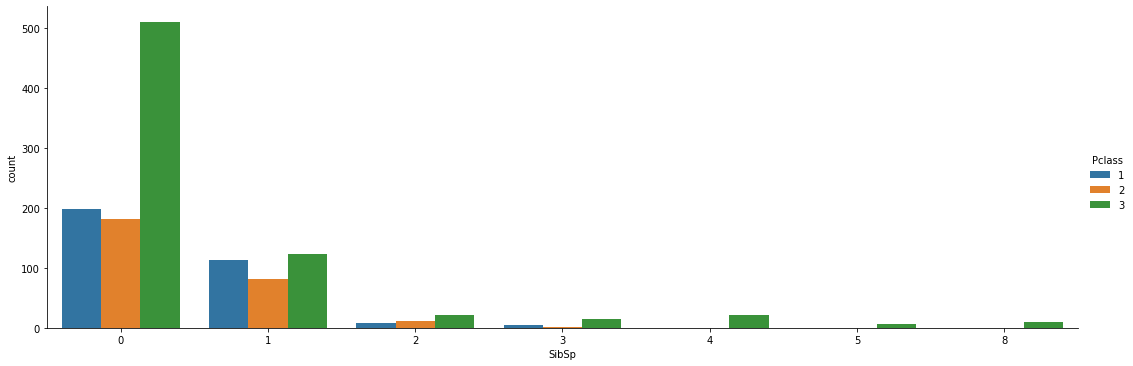

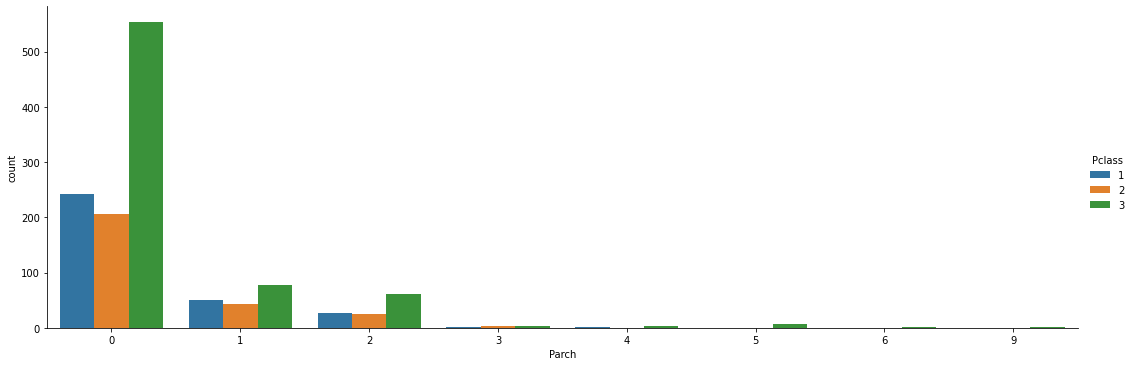

In [ ]:
sns.catplot(kind='count', x='SibSp',  hue='Pclass', data=data, height=5, aspect=3)
sns.catplot(kind='count', x='Parch',  hue='Pclass', data=data, height=5, aspect=3)

In [ ]:
data.loc[(data['Parch'] == 0 )&((data['Treatment'] =='girl.' )|(data['Treatment'] =='Master.' ))] 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Treatment
14,15,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,5.0,0,0,350406,8.0500,NaN,S,girl.
22,23,3,"McGowan, Miss. Anna ""Annie""",female,5.0,0,0,330923,8.0500,NaN,Q,girl.
39,40,3,"Nicola-Yarred, Miss. Jamila",female,5.0,1,0,2651,8.0500,NaN,C,girl.
111,112,3,"Zabour, Miss. Hileni",female,5.0,1,0,2665,8.0500,NaN,C,girl.
125,126,3,"Nicola-Yarred, Master. Elias",male,6.0,1,0,2651,8.0500,NaN,C,Master.
731,732,3,"Hassan, Mr. Houssein G N",male,6.0,0,0,2699,8.0500,NaN,C,Master.
777,778,3,"Emanuel, Miss. Virginia Ethel",female,5.0,0,0,364516,8.0500,NaN,S,girl.
780,781,3,"Ayoub, Miss. Banoura",female,5.0,0,0,2687,8.0500,NaN,C,girl.
875,876,3,"Najib, Miss. Adele Kiamie ""Jane""",female,5.0,0,0,2667,8.0500,NaN,C,girl.
5,897,3,"Svensson, Mr. Johan Cervin",male,6.0,0,0,7538,8.0500,NaN,S,Master.


In [ ]:
lastname = []
for my_string in data['Name'].loc[(data['Parch'] == 0 )&(data['SibSp'] == 0 )&((data['Treatment'] =='girl.' )|(data['Treatment'] =='Master.' ) ) ] :
  res = my_string.split(',', maxsplit=1)[0]\
                .split(maxsplit=1)[0]
  lastname.append(res)
lastname

['Vestrom',
 'McGowan',
 'Hassan',
 'Emanuel',
 'Ayoub',
 'Najib',
 'Svensson',
 'Watt',
 'Sweet',
 'Betros']

In [ ]:
lastn = []
for my_string in data['Name'] :
  res = my_string.split(',', maxsplit=1)[0]\
                .split(maxsplit=1)[0]
  lastn.append(res)
data['Lastname'] = lastn


parnts = []
for my_string in data.loc[(data['Parch'] == 0 )&(data['Age'] >=20 ) ].itertuples() :
  i = 2
  res = my_string[3].split(',', maxsplit=1)[0]\
                .split(maxsplit=1)[0]
                # data.loc[(data['Parch'] == 0 )&((data['Treatment'] =='girl.' )|(data['Treatment'] =='Master.' ))]
  if (res in lastname):
    parnts.append(my_string)
    data.loc[(data['Lastname'] == res ), 'Parch'] =  1
    # pd.concat([parnts, my_string], axis=1)
# parnts
parnts

# data.loc[(data['Parch'] == 0 )&((data['Treatment'] =='girl.' )|(data['Treatment'] =='Master.' ) ) ] 

[Pandas(Index=161, PassengerId=162, Pclass=2, Name='Watt, Mrs. James (Elizabeth "Bessie" Inglis Milne)', Sex='female', Age=36.0, SibSp=0, Parch=0, Ticket='C.A. 33595', Fare=15.0458, Cabin=nan, Embarked='S', Treatment='Mrs.', Lastname='Watt'),
 Pandas(Index=378, PassengerId=379, Pclass=3, Name='Betros, Mr. Tannous', Sex='male', Age=30.0, SibSp=0, Parch=0, Ticket='2648', Fare=8.05, Cabin=nan, Embarked='C', Treatment='Mr.', Lastname='Betros'),
 Pandas(Index=499, PassengerId=500, Pclass=3, Name='Svensson, Mr. Olof', Sex='male', Age=30.0, SibSp=0, Parch=0, Ticket='350035', Fare=8.05, Cabin=nan, Embarked='S', Treatment='Mr.', Lastname='Svensson'),
 Pandas(Index=851, PassengerId=852, Pclass=3, Name='Svensson, Mr. Johan', Sex='male', Age=30.0, SibSp=0, Parch=0, Ticket='347060', Fare=8.05, Cabin=nan, Embarked='S', Treatment='Mr.', Lastname='Svensson'),
 Pandas(Index=206, PassengerId=1098, Pclass=3, Name='McGowan, Miss. Katherine', Sex='female', Age=24.0, SibSp=0, Parch=0, Ticket='9232', Fare=8.

In [ ]:
data.loc[(data['SibSp'] >= 2 )] 
data.loc[(data['Lastname'] == "Svensson" )] 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Treatment,Lastname
499,500,3,"Svensson, Mr. Olof",male,30.0,0,1,350035,8.05,NaN,S,Mr.,Svensson
851,852,3,"Svensson, Mr. Johan",male,30.0,0,1,347060,8.05,NaN,S,Mr.,Svensson
5,897,3,"Svensson, Mr. Johan Cervin",male,6.0,0,1,7538,8.05,NaN,S,Master.,Svensson


In [ ]:
# d = data[['Name', 'Lastname','Embarked']].groupby(['Lastname'])
# c = data[['Name', 'Lastname','SibSp']].groupby(['Lastname']).count()

# c


In [ ]:
# lastn = []
# for my_string in data['Name'] :
#   res = my_string.split(' ', maxsplit=1)[0]\
#                 .split(maxsplit=1)[0]
#   if ("(" in my_string):
#     # print('obj is a string!')
#     lastn.append(res)
#   else:
#     lastn.append("null")
# data['m'] = lastn
# data


In [ ]:
# data.loc[(data['m'] != 'null')&(data['Sex'] == 'female')&(data['SibSp'] == 0)] 
# data.loc[(data['Lastname'] == 'Greenfield')] 


In [ ]:
data['Embarked_S'] = data['Embarked'].map({'S': 1, 'C': 0, 'Q': 0})
data['Embarked_C'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 0})
data['Embarked_Q'] = data['Embarked'].map({'S': 0, 'C': 0, 'Q': 1})
data['adultW'] = data['Treatment'].map({'girl.': 0, 'Master.': 0, 'Mrs.': 1, 'Miss.': 1, 'Mr.': 0})
data['adultM'] = data['Treatment'].map({'girl.': 0, 'Master.': 0, 'Mrs.': 0, 'Miss.': 0, 'Mr.': 1})
data['kid'] = data['Treatment'].map({'girl.': 1, 'Master.': 1, 'Mrs.': 0, 'Miss.': 0, 'Mr.': 0})
data.drop(['Embarked', 'Treatment', 'Lastname', 'Ticket', 'Cabin', 'Name'], axis='columns', inplace=True)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q,adultW,adultM,kid
0,1,3,0,30.0,1,0,8.05,1,0,0,0,1,0
1,2,1,1,36.0,1,0,60.00,0,1,0,1,0,0
2,3,3,1,24.0,0,0,8.05,1,0,0,1,0,0
3,4,1,1,36.0,1,0,60.00,1,0,0,1,0,0
4,5,3,0,30.0,0,0,8.05,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,30.0,0,0,8.05,1,0,0,0,1,0
414,1306,1,1,36.0,0,0,60.00,0,1,0,1,0,0
415,1307,3,0,30.0,0,0,8.05,1,0,0,0,1,0
416,1308,3,0,30.0,0,0,8.05,1,0,0,0,1,0


In [ ]:
data['Family'] = data['SibSp'] +  data['Parch'] 
data.drop(['SibSp', 'Parch'], axis='columns', inplace=True)

data

,PassengerId,Pclass,Sex,Age,Fare,Embarked_S,Embarked_C,Embarked_Q,adultW,adultM,kid,Family
0,1,3,0,30.0,8.05,1,0,0,0,1,0,1
1,2,1,1,36.0,60.00,0,1,0,1,0,0,1
2,3,3,1,24.0,8.05,1,0,0,1,0,0,0
3,4,1,1,36.0,60.00,1,0,0,1,0,0,1
4,5,3,0,30.0,8.05,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,30.0,8.05,1,0,0,0,1,0,0
414,1306,1,1,36.0,60.00,0,1,0,1,0,0,0
415,1307,3,0,30.0,8.05,1,0,0,0,1,0,0
416,1308,3,0,30.0,8.05,1,0,0,0,1,0,0


In [ ]:
data.drop(['PassengerId'], axis='columns', inplace=True)

train = data.iloc[:train_lines]
test = data.iloc[train_lines:]
train.shape

(891, 11)

com base nos modelos de predição aplicados em https://github.com/rafaelnduarte/Titanic_Kaggle/blob/master/Titanic_Logistic_Regression_Decision_Tree.ipynb





In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state = 42)

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(train, survived)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, train, survived, cv=3, scoring='accuracy')

array([0.62962963, 0.76094276, 0.67003367])

In [ ]:
forest_clf.fit(train, survived)

y_pred_forest = forest_clf.predict(test)

In [ ]:
passengerId = test['PassengerId']

submission = pd.DataFrame({
    "PassengerId": passengerId,
    "Survived": y_pred_forest
})

# Generating csv file
from google.colab import files

submission.to_csv('submission_forest.csv', index=False)
files.download('submission_forest.csv')

In [ ]:
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(train, survived)

# Checking the accuracy of the model
acc_logReg = round(lr_model.score(train, survived) * 100, 2)
print("Logistic Regression Model Accuracy: {}".format(acc_logReg))

Logistic Regression Model Accuracy: 82.49


In [ ]:
passengerId = test['PassengerId']


In [ ]:
y_pred_lr = lr_model.predict(test)

submission = pd.DataFrame({
    "PassengerId": passengerId,
    "Survived": y_pred_lr
})

# Generating csv file
from google.colab import files

submission.to_csv('submission_lr.csv', index=False)
files.download('submission_lr.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

# Creating a Decision Tree model
tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(train, survived)

# Checking the accuracy of the model
acc_tree = round(tree_model.score(train, survived) * 100, 2)
print("Decision Tree Model Accuracy: {}".format(acc_tree))

Decision Tree Model Accuracy: 83.28


In [ ]:
y_pred_tree = tree_model.predict(test)

submission = pd.DataFrame({
    "PassengerId": passengerId,
    "Survived": y_pred_tree
})

# generating csv file
submission.to_csv('submission_tree.csv', index=False)
files.download('submission_tree.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
gender = pd.read_csv('gender_submission.csv')
from sklearn.metrics import mean_absolute_error
erro = mean_absolute_error(y_pred_tree,gender.Survived)
erro 

0.2607655502392344